In [42]:
#Bilal İhsan Tuncer
#150190089

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [43]:
# read data from files
tra = pd.read_csv("optdigits.tra",header=None)
X_training = tra.values[:,:64]
y_training = tra.values[:,-1]

print(X_training.shape)
print(y_training.shape)

tes = pd.read_csv("optdigits.tes",header=None)
X_testing = tes.values[:,:64]
y_testing = tes.values[:,-1]

print(X_testing.shape)
print(y_testing.shape)

y_train = pd.get_dummies(y_training).values


(3823, 64)
(3823,)
(1797, 64)
(1797,)


In [44]:
# sigmoid function
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

### Backpropagation algorithm to get a converged Weight vector

In [45]:
# using pseudo code of backpropagation from book

D = 64  # dimention of the input array
H = 2   # dimention of the hidden layer
K = 10  # dimention of the output array (number of classes)
# For an autoencoder K value will be 64 but i could not get proper output for 64 to 64 encoder


np.random.seed(1)
W = np.random.uniform(size=(H, D),low=-0.01,high=0.01) # initialize the Weight vector to generate the hidden layer 
V = np.random.uniform(size=(K,H),low=-0.01,high=0.01)  # initialize the vector for transformation to get K size output from H size hidden layer

Z = np.zeros((H,)) # initialize the Z vector which carries the Hidden layer values
Y = np.zeros((K,)) # initialize the Y output vector for a single input

# initialize the derivative vectors
deltaV = np.zeros((K,H))    
deltaW = np.zeros((H,D))

learning_rate = 0.0001
for itr in range(100):
    for t in range(X_training.shape[0]):    # t value to get tuple from Xtrain input and Ytrain output
        x = X_training[t]
        r = y_train[t]
        for h in range(H):
            Z[h] = sigmoid(W[h] @ x)        # get sigmoid value for hidden layer
        for i in range(K):
            Y[i] = V[i] @ Z                 # get the output from hidden layer
        for i in range(K):
            deltaV[i] = learning_rate * (r[i] - Y[i]) * Z   # next change in V vector
            
        for h in range(H):
            deltaW[h] = learning_rate * ((r - Y) @ V[:,h]) * Z[h] * (1 - Z[h]) * x  # next change in W vector

        # update weight vectors
        for i in range(K):
            V[i] = V[i] + deltaV[i]
        for h in range(H):
            W[h] = W[h] + deltaW[h]


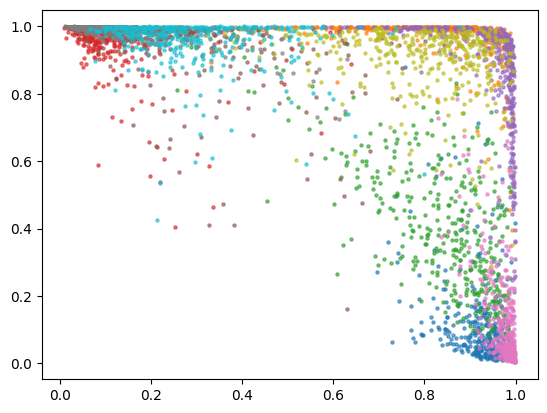

In [46]:
hidden = X_training @ W.T   # wTranspose * X to attain the hidden layer
shidden = sigmoid(hidden)   # sigmoid hidden layer
# yexpected = ((V @ shidden.T).T)   # to get the output values but its not necessary for this task

# plot the values of hidden layer according to the classes of the points
# each color repesents different classes
for i in range(0,10):
    x = shidden[y_training == i]
    plt.scatter(x[:, 0], x[:, 1 ],alpha=0.6,s=5)

plt.show()


### Note
<p> I tried many methods and algorithms but couldn't get the expected output </p>

### Outputs of the most correlated 2 feature of input vector.

In [36]:
# PCA from HW2
def PCA(X, k=None, varRetained = 0.95, show = False):
    x = X.copy()
    
    # Calculate the necessary variables.
    mean = np.mean(x)
    cov = np.cov(x.T)
    eig_vals, eig_vecs = np.linalg.eig(cov)

    # This loop is necessary for both k=None and show=True cases.
    if k==None or show:
        k_e = 1 # This is a variable to keep the k value according to given varRetained value.
        pervar = []

        # Calculate the variance retained value for each k value.
        for i in range(1,eig_vals.shape[0]):
            sum_of_choosen = np.sum(eig_vals[:i])
            sum_of_all = np.sum(eig_vals)
            vretained = sum_of_choosen/sum_of_all
            pervar.append(vretained*100)
            if vretained < varRetained:
                k_e += 1
    if show:
        plt.title("Variance vs. #Features")
        plt.plot(range(1,eig_vals.shape[0],1),pervar)
        plt.show()
        print(pervar[k-1])
    if k ==None:
        k = k_e

    # Choose the top k vector
    topvecs = eig_vecs[:,:k]

    # Reduce features to k dimension
    reducedX = (x-mean) @ topvecs
    
    return reducedX

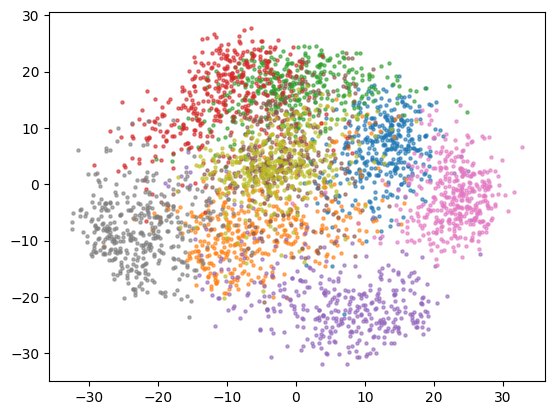

In [39]:


reducedX = PCA(X_training,k=2,show=False)
# reducedX = sigmoid(reducedX)
classes = []
for i in range(0,9):
    x = reducedX[y_training == i]
    classes.append(x)
    plt.scatter(x[:, 0], x[:, 1 ],alpha=0.6,s=5)

plt.show()